<h1>Logistic Regression</h1>
<p>Here we will work on predicting the churn value of the customer of a company using logistic regression. Logistic Regression is used when we are dealing with classification(In this case, 0/1). Logistic Regression is similar to linear regression but instead it relies on probability of a particular record being class 0 or 1. If the probability lies above a certain throshold value then it is classified as 1 or else 0.
</p>

In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [3]:
features = ['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']
X = np.asanyarray(df[features])
y = np.asanyarray(df['custcat'])

<h2>Preprocessing</h2>
<p>Here we use Standard Scaler to scale the input data to a range between -1 to 1.</p>

In [4]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148,  1.56469673],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673, -0.63910148],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148, -0.63910148]])

<h2>Train Test Split</h2>
<p>Split the input dataset into traning set and testing set</p>

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

<p>Initialise the Logistic Regression Model and then train it on the training dataset. We then use the model to predict churn for the testing dataset.</p>

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 0.01, solver='liblinear', random_state= 44)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

<p>We can find out the probabilities that predictions are accurate using the predict_prob method</p>

In [19]:
ypred_prob = model.predict_proba(X_test)
ypred_prob[0:5]

array([[0.21717098, 0.30704438, 0.22958811, 0.24619653],
       [0.21069761, 0.2054436 , 0.29344643, 0.29041236],
       [0.29022137, 0.25281383, 0.26835259, 0.18861221],
       [0.22189318, 0.26701792, 0.2992553 , 0.2118336 ],
       [0.2946804 , 0.27090482, 0.24535863, 0.18905614]])

<h2>Accuracy of Model</h2>

In [20]:
from sklearn import metrics

print(metrics.classification_report(y_test, ypred))


precision    recall  f1-score   support

         1.0       0.89      0.62      0.73        13
         2.0       0.50      0.44      0.47         9
         3.0       0.33      0.38      0.35         8
         4.0       0.57      0.80      0.67        10

    accuracy                           0.57        40
   macro avg       0.57      0.56      0.55        40
weighted avg       0.61      0.57      0.58        40



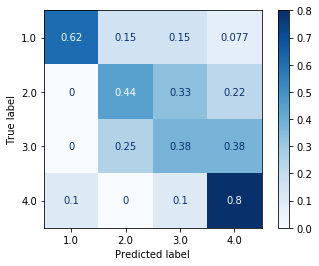

In [21]:
print(metrics.plot_confusion_matrix(model, X_test, y_test, normalize='true', cmap = 'Blues'))